# ROF Denoising Demo
In this demo we will illustrate the process of image denoising of the ROF model.
$$
\min_{u} \frac{1}{2}\|u-f\|^2+\lambda\sum_{j=1}^n\|(\mathbb{K}u)_j\|
$$

In [1]:
using Pkg, Random, Images, TestImages, LinearAlgebra
using AbstractOperators
using StructuredOptimization

In [2]:
include("../BilevelImagingParameterLearning.jl")
using .BilevelImagingParameterLearning

In [3]:
Random.seed!(123); # For reproductibility

In [23]:
Y = datasetimage("1_smiley_noisy","../datasets/smiley_dataset")
Y[Y .< 0] .= 0. # Make sure pixels are in range
Y[Y .> 1] .= 1.
Gray.(Y)
Y = vcat(Y...);

In [24]:
#Xgt = testimage("cameraman")
#Y = Xgt .+ sqrt(0.006*norm(Xgt,Inf))*randn(size(Xgt)) # Add noise
#Y[Y .< 0] .= 0. # Make sure pixels are in range
#Y[Y .> 1] .= 1.
#Gray.(Y)
size(Y)

(16384,)

In [25]:
V = Variation(size(Y)) # Define the finite differences gradient operator
U = Variable(size(V,1)...)
lambda = 0.17
Y = float(Y);

ErrorException: use FiniteDiff instead!

In [20]:
@time begin
@minimize ls(-V'*U+Y) + conj(lambda*norm(U,2,1,2)) with ForwardBackward(tol = 1e-3, gamma = 1/8, fast = true) # Minimizing the dual formulation
end

  0.241855 seconds (1.89 k allocations: 112.444 MiB, 6.33% gc time)


((Variable(Float64, (16384, 2)),), 291)

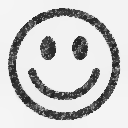

In [12]:
X = Gray.(-V'*(~U)+Y)